In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk import word_tokenize ,sent_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
# import regex as re
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
train = pd.read_csv('./setrain.tsv',sep='\t');
test = pd.read_csv('test.tsv',sep='\t');

FileNotFoundError: [Errno 2] File b'train.tsv' does not exist: b'train.tsv'

In [358]:
print(train.shape)
print(test.shape)

(156060, 4)
(66292, 3)


In [359]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [360]:
train.isna().any()

PhraseId      False
SentenceId    False
Phrase        False
Sentiment     False
dtype: bool

In [361]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [362]:
train['Phrase'][0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [363]:
train['Phrase'][1]

'A series of escapades demonstrating the adage that what is good for the goose'

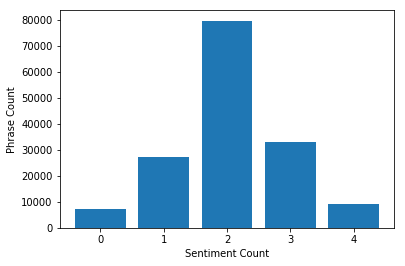

In [364]:
sentiment_count = train.groupby('Sentiment').count()
plt.bar(sentiment_count.index , sentiment_count['Phrase'])
plt.xlabel('Sentiment Count')
plt.ylabel('Phrase Count')
plt.show()

In [365]:
combi = train.append(test,ignore_index=True)
combi.head()

,Phrase,PhraseId,SentenceId,Sentiment
0,A series of escapades demonstrating the adage ...,1,1,1.0
1,A series of escapades demonstrating the adage ...,2,1,2.0
2,A series,3,1,2.0
3,A,4,1,2.0
4,series,5,1,2.0


In [366]:
combi.dtypes

Phrase         object
PhraseId        int64
SentenceId      int64
Sentiment     float64
dtype: object

In [367]:
import string
a = string.punctuation
b = a+"'s"
b

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\'s'

In [368]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/abhaik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [369]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

def f(x):
#     r = re.findall(a,x)
    phrase = x.split()
    for i in range(0,len(phrase)):
        k = phrase.pop(0)
        if k not in b:
            if len(k) > 3:
                phrase.append(lemmatizer.lemmatize(k).lower())
    
    return phrase
    
    

In [370]:
combi['tidy_Phrase'] = combi['Phrase'].apply(lambda x : ' '.join(f(x)))

In [371]:
combi.head()
combi.shape

(222352, 5)

In [372]:
combi['word_count'] = combi['tidy_Phrase'].apply(lambda x: len(x))
combi.head()

,Phrase,PhraseId,SentenceId,Sentiment,tidy_Phrase,word_count
0,A series of escapades demonstrating the adage ...,1,1,1.0,series escapade demonstrating adage that what ...,133
1,A series of escapades demonstrating the adage ...,2,1,2.0,series escapade demonstrating adage that what ...,56
2,A series,3,1,2.0,series,6
3,A,4,1,2.0,,0
4,series,5,1,2.0,series,6


In [373]:
combi.drop(combi[combi.word_count == 0].index,inplace=True)

In [374]:
combi.head()

,Phrase,PhraseId,SentenceId,Sentiment,tidy_Phrase,word_count
0,A series of escapades demonstrating the adage ...,1,1,1.0,series escapade demonstrating adage that what ...,133
1,A series of escapades demonstrating the adage ...,2,1,2.0,series escapade demonstrating adage that what ...,56
2,A series,3,1,2.0,series,6
4,series,5,1,2.0,series,6
5,of escapades demonstrating the adage that what...,6,1,2.0,escapade demonstrating adage that what good goose,49


In [375]:
a = combi['word_count'].value_counts()
a

10     8044
5      8004
4      7971
9      7491
6      7463
11     7458
7      6942
12     6741
15     6346
14     6259
16     6176
13     6168
8      5863
17     5828
18     5128
19     4761
20     4520
21     4482
22     4225
23     3952
24     3677
25     3293
26     3156
27     3070
28     2926
30     2758
29     2744
31     2524
32     2376
33     2203
       ... 
186      11
184      10
191       9
192       8
189       7
200       7
183       7
188       6
185       5
195       5
197       5
182       5
213       4
187       4
206       4
208       3
201       3
194       3
198       2
196       2
217       1
214       1
218       1
199       1
234       1
210       1
204       1
193       1
202       1
211       1
Name: word_count, Length: 211, dtype: int64

In [376]:
combi.reset_index(drop=True,inplace=True)
combi.head()

,Phrase,PhraseId,SentenceId,Sentiment,tidy_Phrase,word_count
0,A series of escapades demonstrating the adage ...,1,1,1.0,series escapade demonstrating adage that what ...,133
1,A series of escapades demonstrating the adage ...,2,1,2.0,series escapade demonstrating adage that what ...,56
2,A series,3,1,2.0,series,6
3,series,5,1,2.0,series,6
4,of escapades demonstrating the adage that what...,6,1,2.0,escapade demonstrating adage that what good goose,49


In [377]:
from nltk.stem.porter import *

token = combi['tidy_Phrase'].apply(lambda x:x.split())
stemmer = PorterStemmer()

token = token.apply(lambda x: [ stemmer.stem(i)  for i in x])

token.head()

0    [seri, escapad, demonstr, adag, that, what, go...
1    [seri, escapad, demonstr, adag, that, what, go...
2                                               [seri]
3                                               [seri]
4    [escapad, demonstr, adag, that, what, good, goos]
Name: tidy_Phrase, dtype: object

In [378]:

for i in range(0,len(token)):
    token[i] = ' '.join(token[i])
    
# combi['tidy_Phrase'] = token



In [379]:
combi.iloc[91]

Phrase         have a hard time sitting through this one
PhraseId                                             104
SentenceId                                             3
Sentiment                                              0
tidy_Phrase          have hard time sitting through this
word_count                                            35
Name: 91, dtype: object

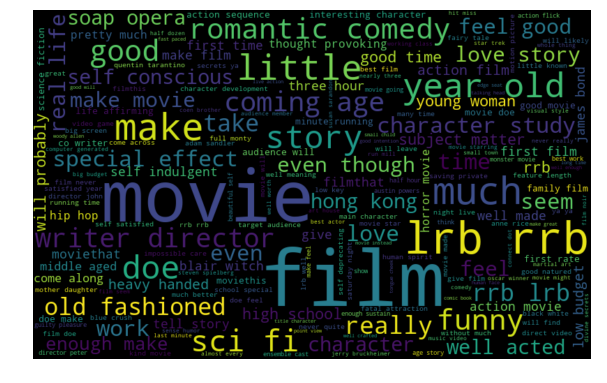

In [380]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



word = ''.join([ phrase for phrase in combi['tidy_Phrase']])


wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()





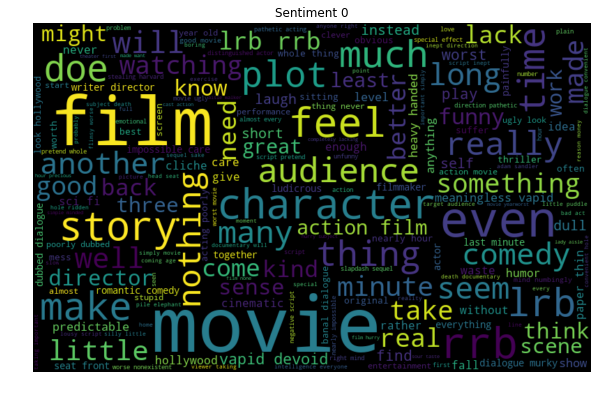

In [381]:
word = ''.join([ phrase for phrase in combi['tidy_Phrase'][combi['Sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word)

plt.figure(figsize=(10, 7))
plt.title('Sentiment 0')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


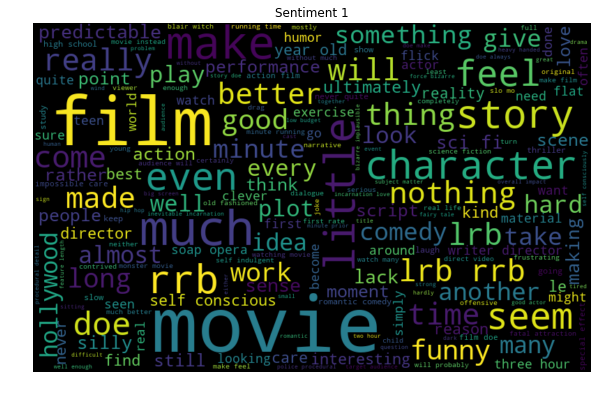

In [382]:
word = ''.join([ phrase for phrase in combi['tidy_Phrase'][combi['Sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word)

plt.figure(figsize=(10, 7))
plt.title('Sentiment 1')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

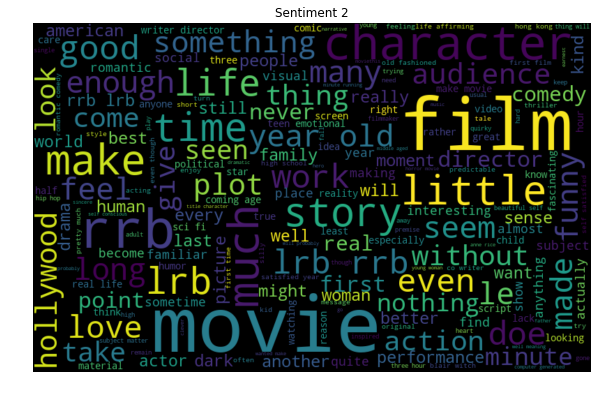

In [383]:
word = ''.join([ phrase for phrase in combi['tidy_Phrase'][combi['Sentiment']==2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word)

plt.figure(figsize=(10, 7))
plt.title('Sentiment 2')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

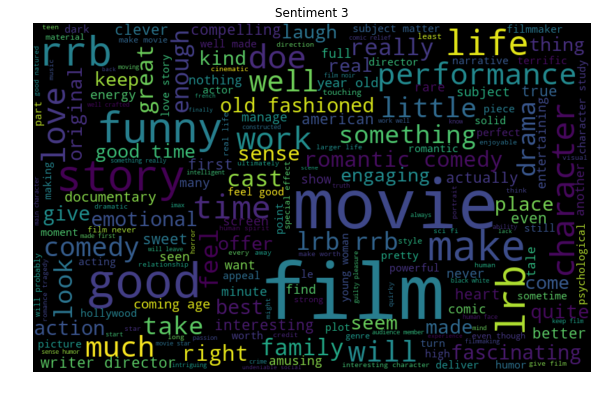

In [384]:
word = ''.join([ phrase for phrase in combi['tidy_Phrase'][combi['Sentiment']==3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word)

plt.figure(figsize=(10, 7))
plt.title('Sentiment 3')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

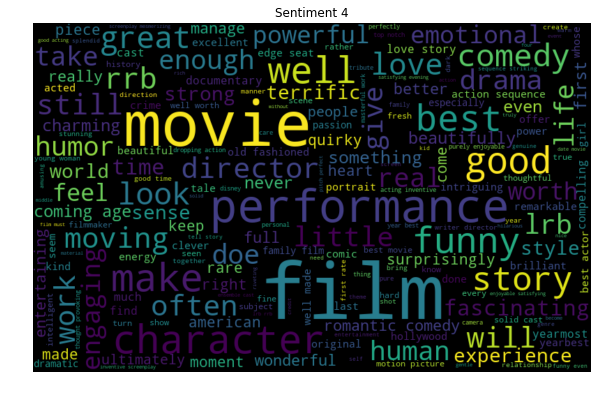

In [385]:
word = ''.join([ phrase for phrase in combi['tidy_Phrase'][combi['Sentiment']==4]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word)

plt.figure(figsize=(10, 7))
plt.title('Sentiment 4')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [386]:
combi.loc[(combi['tidy_Phrase'].apply(lambda x: 'good' in x))&(combi['Sentiment']==2),
          'tidy_Phrase' ].head().values

array(['series escapade demonstrating adage that what good goose',
       'escapade demonstrating adage that what good goose',
       'escapade demonstrating adage that what good goose',
       'demonstrating adage that what good goose', 'that what good goose'],
      dtype=object)

In [387]:
combi.loc[(combi['tidy_Phrase'].apply(lambda x:'good' in x))&(combi['Sentiment']==4),'tidy_Phrase'].head().values

array(['good',
       'pretty good execution story that richer than one hollywood action screenwriter usually come with their',
       'pretty good execution story that richer than one hollywood action screenwriter usually come with their',
       'particularly good film', 'particularly good film'], dtype=object)

In [388]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/abhaik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [392]:
def filter_world(phrase):
    phrase_sentiment=defaultdict(int)
    for word_list in phrase:
        for token in word_list.split():
            phrase_sentiment[token] +=1
    
    return phrase_sentiment
        
    

In [393]:
phrases_0 = combi.loc[(combi['Sentiment']==0),'tidy_Phrase'].values
phrase_sentiment_0 = filter_world(phrases_0)
series0 = pd.Series([x for x in phrase_sentiment_0.keys() ])

phrases_1 = combi.loc[(combi['Sentiment']==1),'tidy_Phrase'].values
phrase_sentiment_1 = filter_world(phrases_1)
series1 = pd.Series([x for x in phrase_sentiment_1.keys() ])

phrases_2 = combi.loc[(combi['Sentiment']==2),'tidy_Phrase'].values
phrase_sentiment_2  = filter_world(phrases_2)
series2 = pd.Series([x for x in phrase_sentiment_2.keys() ])


phrases_3 = combi.loc[(combi['Sentiment']==3),'tidy_Phrase'].values
phrase_sentiment_3  = filter_world(phrases_3)
series3 = pd.Series([x for x in phrase_sentiment_3.keys() ])


phrases_4 = combi.loc[(combi['Sentiment']==4),'tidy_Phrase'].values
phrase_sentiment_4 = filter_world(phrases_4)
series4 = pd.Series([x for x in phrase_sentiment_4.keys() ])


In [394]:
list_series = [series0,series1,series2,series3,series4]
for series in list_series:
    print(series.duplicated().any())
# a = set(series3.index).intersection(set(stop_word))
# len(list(a))

False
False
False
False
False


In [457]:
# for series in list_series:
#     print(len(series))
# pd.merge(series0,series1 , on=[series0.index,series1.index],how='inner')

combi['tidy_Phrase'][0]

'series escapade demonstrating adage that what good goose also good gander some which occasionally amuses none which amount much story'

In [396]:
a = (set(series1).intersection(set(series2))
    .intersection(set(series3)).intersection(set(series4)).intersection(set(series0)))

comm_token = filter_world(list(a))
# comm_token
_tokens = pd.Series([x for x in comm_token.keys() ])





# a = pd.Series(list(a))


In [433]:
_tokens.shape

(2759,)

False

In [398]:
combi.loc[(combi.Sentiment.isna())]

test_df = combi.loc[(combi.Sentiment.isna())]
train_df = combi.iloc[:154094,:]


In [471]:
train_df.shape

(154094, 6)

In [399]:
test_df=test_df.reset_index(drop=True)

In [459]:
from sklearn.feature_extraction import text

my_stop_word = text.ENGLISH_STOP_WORDS.union(_tokens)

def my_preprocessor(doc):
    phrase = doc.split()
    for i in range(0,len(phrase)):
        k = phrase.pop(0)
        if k not in my_stop_word:
            phrase.append(k)
            
#     print(phrase)
    return ' '.join(phrase)

In [401]:
train_df.shape

(154094, 6)

In [473]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(analyzer='word',max_df=0.8,stop_words='english',ngram_range=(1,3),preprocessor=my_preprocessor)

tf_train = tf.fit_transform(train_df['tidy_Phrase'])
tf_test = tf.transform(test_df['tidy_Phrase'])

In [474]:
tf_train.shape

(154094, 42206)

In [475]:
X_train , X_test , y_train , y_test = train_test_split(tf_train,train_df['Sentiment'] ,test_size =0.3,
                                                       random_state=123)

In [469]:
X_train.shape

(107865, 42206)

In [462]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
nb = RandomForestClassifier(n_jobs=-1)
nb.fit(X_train , y_train)
predict = nb.predict(X_test)
print('Accuracy',f1_score(y_test,predict,average='weighted'))

/home/abhaik/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 0.5488699846311067


In [477]:
a = nb.predict(tf_test)

# X_train , X_test , Y_train , Y_test = train_test_split(text_count, data['Sentiment'] ,test_size=0.3
#                                                        ,random_state = 1 )

In [482]:
pd.Series(a).value_counts()

2.0    49640
3.0     7150
1.0     6286
4.0     1397
0.0      761
dtype: int64

In [483]:
sentiment_count = train.groupby('Sentiment').count()
sentiment_count

,PhraseId,SentenceId,Phrase
Sentiment,,,
0,7072,7072,7072
1,27273,27273,27273
2,79582,79582,79582
3,32927,32927,32927
4,9206,9206,9206


In [406]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score
# nb = MultinomialNB()
# nb.fit(X_train , Y_train)
# predict = nb.predict(X_test)
# print('Accuracy',accuracy_score(Y_test,predict))

In [407]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tf=TfidfVectorizer()
# text_tf= tf.fit_transform(data['Phrase'])

In [408]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(
#     text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [409]:
# text_tf

In [410]:
# nb1 = MultinomialNB().fit(X_train1,y_train1)
# predict2 = nb1.predict(X_test1)
# print('Accuracy',accuracy_score(y_test1,predict2))

In [411]:
# from sklearn.linear_model import LogisticRegression 
# from sklearn.svm import LinearSVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
# from sklearn.naive_bayes import MultinomialNB

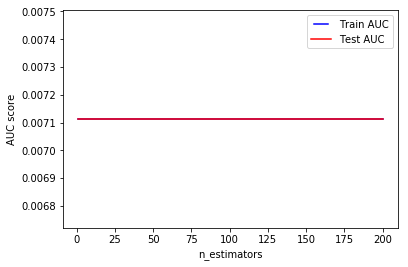

In [412]:
# def getmodel():
#     lg = LogisticRegression( solver='liblinear')
#     sv = LinearSVC()
#     mnb = MultinomialNB()
    
#     model = {
#         'logisticRegression':lg,
#         'SupportVector':sv,
#         'Naive':mnb
#     }
    
#     return model
    
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()
    

In [413]:
# def train_baselearner(model,inp,out):
#         for i , (name,m) in enumerate(model.items()):
#             print(m)
#             m.fit(inp,out)
#             print('done {}'.format(i),name)

In [414]:
# def predict(basemodel , test):
#     pred = np.zeros((test.shape[0],len(basemodel)))
#     for i , (name,m) in enumerate(basemodel.items()):
#         p = m.predict(test)
#         pred[:,i] = p[:,1]
    
#     return pred



In [415]:
# def stacking(model , train , y  ):
#     fold = StratifiedKFold(n_splits=2,random_state=123)
# #     test_pred=np.empty((test.shape[0],1),float)
# #     train_pred=np.empty((train.shape[0],1),float)
#     cv_preds, cv_y = [], []
#     for train_idx , test_idx in fold.split(train,y):
#         fold_xtrain, fold_ytrain = train[train_idx, :], y[train_idx]
#         fold_xtest, fold_ytest = train[test_idx, :], y[test_idx]
#         train_baselearner(model , fold_xtrain , fold_ytrain)
#         base_pred = predict(model , fold_xtest)
#         cv_preds.append(base_pred)
#         cv_y.append(fold_ytest)
        
    
#     print(cv_preds)
#     print(cv_y)
        
        
        
        
        
    
    

In [416]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(text_tf, data['Sentiment'],
#                                                         test_size=0.3, random_state=123)


# print(type(X_train1))

# l = LogisticRegression().fit(X_train1,y_train1)

# # type(X_train1)


# basemodel = getmodel()
# stacking(basemodel,X_train1,y_train1)